# Evolutionary Strategies

A test nb to replicate the work done by:

- Andrej Karpathy: https://github.com/karpathy/randomfun/blob/master/es.ipynb 
- Evolutionary Strategies blog post by otoro- https://blog.otoro.net/2017/10/29/visual-evolution-strategies/

<BR>

## ES Random Fun - Karpathy

In [1]:
# General Imports
import os
import sys
import json
import time
import numpy as np
from random import shuffle


# Visualization Imports
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython import display
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
%matplotlib inline


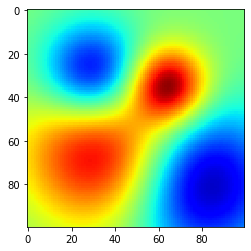

In [2]:
# Generate a toy 2D regression dataset (for visualizing the Evolutionary Optimization)

# Create the Optimization Landscape
size = 100 #X, Y will be 100 values evenly spaced between 0 & 1 -- get from linspace func below 
X, Y = np.meshgrid(np.linspace(-1, 1, size), np.linspace(-1, 1, size)) #meshgrid makes a grid out of the two evenly spaced arrays (linspaces are 100 evenly spaced values in range `size`)

# Set Gradients (create gradients by shifting the grid, combine all in agg function)
mux, muy, sigma = 0.3, -0.3, 4 #fixed mus + std dev
G1 = np.exp(-((X-mux)**2 + (Y-muy)**2)/2.0 * sigma**2)

mux, muy, sigma = -0.3, 0.3, 2
G2 = np.exp(-((X-mux)**2 + (Y-muy)**2)/2.0*sigma**2)

mux, muy, sigma = 0.6, 0.6, 2
G3 = np.exp(-((X-mux)**2 + (Y-muy)**2)/2.0*sigma**2)

mux, muy, sigma = -0.4, -0.4, 3
G4 = np.exp(-((X-mux)**2 + (Y-muy)**2)/2.0*sigma**2)

G = G1 + G2 - G3 - G4

fig, ax = plt.subplots()
im = ax.imshow(G, vmin=-1, vmax=1, cmap='jet') #og = jet
#plt.axis('off') #so set to on if commented out

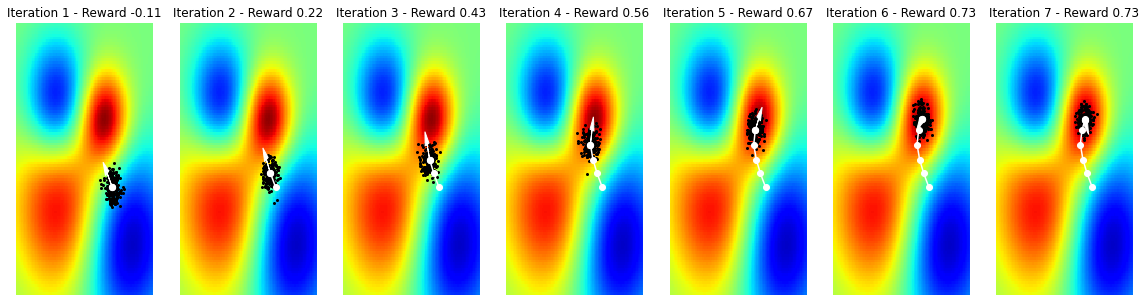

In [10]:
np.random.seed(3)
n_steps = 7 # number of steps to take (and plot horizontally)
alpha = 0.03 # learning rate - handles how you would expect (Too Small, optimizing barely moves dist. Vs. Too large, bounces around even beyond "data")
sigma = 3 # standard deviation of the samples around current parameter vector - fixed std dev for this implementation

w = np.array([70.0, 60.0]) #start point
plt.figure(figsize=(20,5))

prev_x, prev_y = [], []
for q in range(n_steps):
    
    # draw the optimization landscape -- the GradientScape that we defined in above cell
    ax1 = plt.subplot(1, n_steps, q+1)
    plt.imshow(G, vmin=-1, vmax=1, cmap='jet')

    # draw a population of samples in black
    noise = np.random.randn(200, 2) #200x2 values drawn from the "standard normal" distribution
    wp = np.expand_dims(w, 0) + sigma*noise #add the generated noise to starting point's values (normally distributed data around starting value)
    x,y = zip(*wp)
    plt.scatter(x, y, 4, 'k', edgecolors='face')

    # draw the current parameter vector in white (movement of actual starting point)
    plt.scatter([w[0]], [w[1]], 40, 'w', edgecolors='face')

    # draw estimated gradient as white arrow (per update step)
    R = np.array([G[int(wi[1]), int(wi[0])] for wi in wp])
    R -= R.mean()
    R /= R.std() # standardize the rewards to be N(0,1) gaussian
    g = np.dot(R, noise) #error multiplied w noise becomes the gradient?
    u = alpha * g #update = learning_rate * gradient
    plt.arrow(w[0], w[1], u[0], u[1], head_width=3, head_length=5, fc='w', ec='w')
    plt.axis('off')
    plt.title('Iteration %d - Reward %.2f' % (q+1, G[int(w[0]), int(w[1])]))
    
    # draw the history of optimization as a white line
    prev_x.append(w[0])
    prev_y.append(w[1])
    if len(prev_x) > 0:
        plt.plot(prev_x, prev_y, 'wo-')
    w += u #update the weights
    plt.axis('tight')
    
#plt.savefig('evo.png',bbox_inches='tight',pad_inches=0,dpi=200)

/var/folders/25/h27pt_w92kg0719dy47wtrx80000gn/T/ipykernel_38045/227871213.py:5: RuntimeWarning: invalid value encountered in true_divide
  z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)


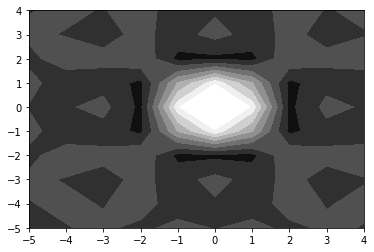

In [25]:
# Sebastian Raschka - Meshgrid Sin Plot Example
x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x, y, z)

## [otoro](https://blog.otoro.net/2017/10/29/visual-evolution-strategies/) Post 